In [137]:
import numpy as np
import pandas as pd
import geopandas as gpd
from itertools import product
import matplotlib.pyplot as plt

In [109]:
years_to_process = range(1980, 2022 + 1)

In [3]:
plad = pd.read_table("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/plad/raw/PLAD_April_2024.dta")

In [117]:
plad_panel = pd.DataFrame(
    list(
        product(
            plad.gid_0.unique(), 
            years_to_process
            )
        ), 
    columns=["gid_0", "year"])

def processor(row):
    qresults = plad.loc[((plad.startyear <= row["year"]) & (plad.endyear >= row["year"]) & (plad.gid_0 == row["gid_0"])),["gid_1", "gid_2"]]
    if qresults.empty:
        return pd.Series()
    else:
        return qresults.iloc[0]

plad_panel[["reg_fav_adm_1", "reg_fav_adm_2"]] = plad_panel.apply(
    processor, 
    axis = 1
    )

In [118]:
plad_panel

,gid_0,year,reg_fav_adm_1,reg_fav_adm_2
0,AFG,1980,NaN,NaN
1,AFG,1981,NaN,NaN
2,AFG,1982,NaN,NaN
3,AFG,1983,NaN,NaN
4,AFG,1984,NaN,NaN
...,...,...,...,...
7520,ZWE,2018,ZWE.10_1,ZWE.10.8_1
7521,ZWE,2019,ZWE.10_1,ZWE.10.8_1
7522,ZWE,2020,ZWE.10_1,ZWE.10.8_1
7523,ZWE,2021,ZWE.10_1,ZWE.10.8_1


In [9]:
adm_1 = gpd.read_file("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/misc/processed/stage_1/gadm/gadm_levelADM_1_simplified.gpkg")
adm_2 = gpd.read_file("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/misc/processed/stage_1/gadm/gadm_levelADM_2_simplified.gpkg")

In [ ]:
adm_1

,GID_1,geometry
0,AFG.1_1,"MULTIPOLYGON (((71.11366 35.9713, 71.10155 35...."
1,AFG.2_1,"MULTIPOLYGON (((63.76845 34.52948, 63.75823 34..."
2,AFG.3_1,"MULTIPOLYGON (((68.06903 35.0794, 68.02675 35...."
3,AFG.4_1,"MULTIPOLYGON (((67.11067 36.00776, 67.14209 35..."
4,AFG.5_1,"MULTIPOLYGON (((67.30598 34.38105, 67.32777 34..."
...,...,...
3657,ZWE.6_1,"MULTIPOLYGON (((30.60252 -18.76013, 30.59981 -..."
3658,ZWE.7_1,"MULTIPOLYGON (((31.30838 -22.41957, 31.30462 -..."
3659,ZWE.8_1,"MULTIPOLYGON (((28.66326 -20.16527, 28.66392 -..."
3660,ZWE.9_1,"MULTIPOLYGON (((30.23974 -22.3068, 30.23462 -2..."


In [127]:
adm_1_panel = pd.DataFrame(
    list(
        product(
            adm_1["GID_1"].unique(), 
            years_to_process
            )
        ), 
    columns=["GID_1", "year"])

adm_1_panel = pd.merge(adm_1_panel, adm_1[["GID_1", "geometry"]])

In [130]:
## Test
reg_fav_adm_1 = pd.merge(adm_1_panel, plad_panel, left_on=["GID_1", "year"], right_on=["reg_fav_adm_1", "year"], how="left")
reg_fav_adm_1["reg_fav"] = (~reg_fav_adm_1.reg_fav_adm_1.isna())
reg_fav_adm_1.drop(columns=["gid_0","reg_fav_adm_1","reg_fav_adm_2"], inplace=True)

In [141]:
reg_fav_adm_1

,GID_1,year,geometry,reg_fav
0,AFG.1_1,1980,"MULTIPOLYGON (((71.11366 35.9713, 71.10155 35....",False
1,AFG.1_1,1981,"MULTIPOLYGON (((71.11366 35.9713, 71.10155 35....",False
2,AFG.1_1,1982,"MULTIPOLYGON (((71.11366 35.9713, 71.10155 35....",False
3,AFG.1_1,1983,"MULTIPOLYGON (((71.11366 35.9713, 71.10155 35....",False
4,AFG.1_1,1984,"MULTIPOLYGON (((71.11366 35.9713, 71.10155 35....",False
...,...,...,...,...
157461,ZWE.10_1,2018,"MULTIPOLYGON (((30.20989 -21.03199, 30.19475 -...",True
157462,ZWE.10_1,2019,"MULTIPOLYGON (((30.20989 -21.03199, 30.19475 -...",True
157463,ZWE.10_1,2020,"MULTIPOLYGON (((30.20989 -21.03199, 30.19475 -...",True
157464,ZWE.10_1,2021,"MULTIPOLYGON (((30.20989 -21.03199, 30.19475 -...",True


<Axes: >

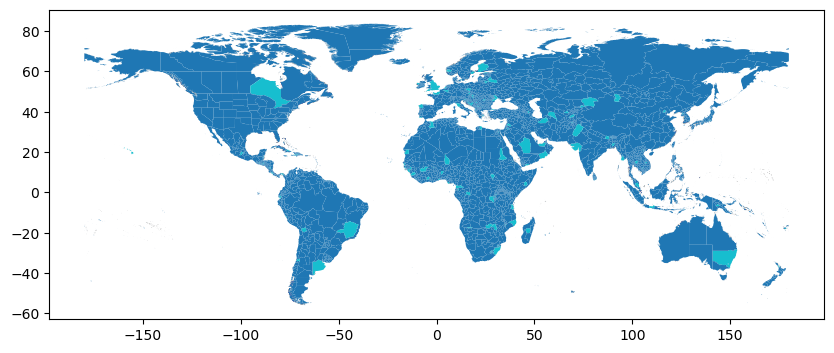

In [140]:
fig, ax = plt.subplots(figsize=(10,20))
gpd.GeoDataFrame(reg_fav_adm_1.query("year==2015")).plot(ax=ax, column="reg_fav")

---

In [5]:
import xarray as xr
import geopandas as gpd
from odc.geo.xr import ODCExtensionDa

plad_xr = xr.open_zarr("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/plad/processed/stage_2/plad_adm1_panel.zarr", consolidated=False)

In [26]:
from odc.geo.geom import Geometry

#cities = gpd.read_file("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/misc/raw/cities/urbanspatial-guppd-v1-gpkg.gpkg", engine = "pyogrio", layer="urbanspatial_guppd_v1_polygons")
countries = gpd.read_file("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/misc/processed/stage_1/gadm/gadm_levelADM_0_simplified.gpkg")
subset_geom = Geometry(countries.query("GID_0=='CHE'").geometry.iloc[0], crs=4326)

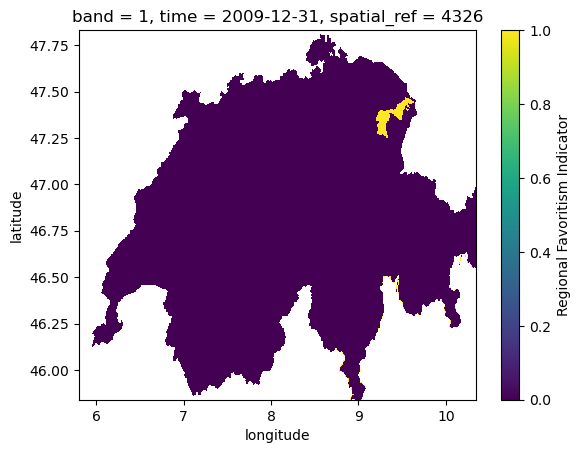

In [38]:
plad_xr.reg_fav.isel(time=17).odc.assign_crs(4326).odc.crop(subset_geom).compute().squeeze().plot.imshow()

---

In [12]:
import pandas as pd
test_data = pd.read_parquet("/scicore/home/meiera/schulz0022/projects/growth-and-temperature/data_nobackup/assembled/modis.parquet/ix=10/iy=11/data.parquet")

In [13]:
test_data["reg_fav"]

83392512    False
83392513    False
83392514     True
83392515     True
83392516     True
            ...  
88042369    False
88042370    False
88042371    False
88042372    False
88042373    False
Name: reg_fav, Length: 203175, dtype: bool